In [21]:
#Importamos los modulos a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import seaborn as sns

import warnings
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

import datetime
import fix_yahoo_finance as yf
import time

In [22]:
datos = pd.read_csv('./data/activos_nasdaq.csv')
datos['Date'] = pd.to_datetime(datos['Date'], format="%Y-%m-%d")
datos = datos.set_index('Date')

In [23]:
datos

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity,Nasdaq
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,126.692297,34.195179,380.471212,153.838431,102.071591,486.548043,56.835418,25.741642,43.472804,21.959082,...,31.076054,21.612346,313.241665,109.665597,43.273428,89.657119,28.373403,194.059192,48.347943,4451.526475
2015-04-30,126.120753,33.955928,373.745599,149.957247,99.289190,476.145052,56.277166,25.546696,43.100635,21.727895,...,30.429190,21.000926,305.201943,109.240261,42.879107,88.903921,28.213903,177.471119,47.388369,4378.670097
2015-05-01,128.796820,34.266068,374.711465,152.854843,102.718455,476.641277,56.844279,25.812531,43.113927,22.113887,...,30.154495,21.585762,315.233651,111.296048,43.286719,89.134311,28.267070,179.411711,47.233121,4435.352217
2015-05-04,134.928736,34.398986,374.862104,151.791505,103.072901,479.193288,57.083531,25.847976,42.746189,22.044858,...,30.305134,21.665513,315.233651,111.916329,43.765222,89.754592,28.426570,180.501632,47.134320,4445.576212
2015-05-05,132.199502,34.443291,373.222791,149.354689,100.946225,470.349860,55.692330,25.599863,42.179076,21.606675,...,31.014026,21.328789,314.890725,108.238951,43.499387,88.620365,27.908193,172.562042,46.760379,4376.811913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,747.951978,99.165133,2189.625694,105.376800,95.159894,1268.757228,194.085776,41.027126,162.008412,40.052400,...,140.910013,120.706590,267.119377,253.996013,63.755977,256.929054,22.950379,94.902920,129.948770,8464.214226
2020-06-02,761.855123,100.370250,2190.839672,103.037456,95.992842,1275.314479,192.632547,41.549934,163.851531,40.743569,...,142.505020,119.271084,268.368799,251.895921,64.881343,254.474516,23.614966,95.018115,127.485370,8514.125541
2020-06-03,756.316904,101.982979,2196.147501,100.813307,98.544853,1272.797913,189.593173,41.594240,164.250283,41.160043,...,137.392136,114.574674,268.138409,245.462726,66.272543,257.061971,24.766915,99.643636,123.675075,8580.173012


In [24]:
rentabilidades_total = datos.pct_change().dropna()

Necesitamos obtener la rentabilidad anualizada.

In [25]:
datos_final = datos.loc['2019-06-04':,:]
datos_final

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity,Nasdaq
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-04,488.878526,90.809069,1532.589119,104.153961,74.238718,933.123437,172.163290,47.167903,109.133928,32.378643,...,61.496383,96.577678,201.148113,151.764922,75.638779,218.959025,30.898831,98.739798,83.613815,6669.891538
2019-06-05,504.332372,91.429349,1540.510987,105.252744,74.070356,923.526811,177.515425,48.514798,111.499855,32.396366,...,61.895135,98.846132,200.341748,153.537152,76.586922,223.407322,29.888660,96.710595,84.118900,6712.742289
2019-06-06,515.444254,92.350909,1554.564771,105.279327,71.323399,925.405375,180.111742,48.824938,113.263224,32.617894,...,61.159660,98.066351,198.799908,148.645797,77.171758,224.364327,29.755743,96.489066,84.499930,6748.256007
2019-06-07,535.647677,92.918022,1598.578105,104.916020,71.456316,944.634071,183.505562,49.560414,116.435515,33.238175,...,62.515416,98.934744,201.351919,153.749820,77.623677,228.148038,30.083605,97.304292,84.942987,6860.392092
2019-06-10,546.254474,94.264917,1648.732216,103.161512,71.872790,957.340961,183.523285,49.994610,117.498854,33.778705,...,60.229239,99.049939,202.388674,153.156123,77.800900,230.850689,31.102638,99.032216,85.049321,6932.227666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,747.951978,99.165133,2189.625694,105.376800,95.159894,1268.757228,194.085776,41.027126,162.008412,40.052400,...,140.910013,120.706590,267.119377,253.996013,63.755977,256.929054,22.950379,94.902920,129.948770,8464.214226
2020-06-02,761.855123,100.370250,2190.839672,103.037456,95.992842,1275.314479,192.632547,41.549934,163.851531,40.743569,...,142.505020,119.271084,268.368799,251.895921,64.881343,254.474516,23.614966,95.018115,127.485370,8514.125541
2020-06-03,756.316904,101.982979,2196.147501,100.813307,98.544853,1272.797913,189.593173,41.594240,164.250283,41.160043,...,137.392136,114.574674,268.138409,245.462726,66.272543,257.061971,24.766915,99.643636,123.675075,8580.173012


In [26]:
df = datos_final.pct_change().dropna()
df

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity,Nasdaq
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-05,0.031611,0.006831,0.005169,0.010550,-0.002268,-0.010284,0.031088,0.028555,0.021679,0.000547,...,0.006484,0.023488,-0.004009,0.011677,0.012535,0.020316,-0.032693,-0.020551,0.006041,0.006425
2019-06-06,0.022033,0.010079,0.009123,0.000253,-0.037086,0.002034,0.014626,0.006393,0.015815,0.006838,...,-0.011883,-0.007889,-0.007696,-0.031858,0.007636,0.004284,-0.004447,-0.002291,0.004530,0.005290
2019-06-07,0.039196,0.006141,0.028312,-0.003451,0.001864,0.020779,0.018843,0.015064,0.028008,0.019017,...,0.022167,0.008855,0.012837,0.034337,0.005856,0.016864,0.011018,0.008449,0.005243,0.016617
2019-06-10,0.019802,0.014496,0.031374,-0.016723,0.005828,0.013452,0.000097,0.008761,0.009132,0.016262,...,-0.036570,0.001164,0.005149,-0.003861,0.002283,0.011846,0.033873,0.017758,0.001252,0.010471
2019-06-11,-0.005126,-0.004982,0.001650,0.006185,-0.000247,-0.001536,-0.002559,0.012230,-0.003771,0.002886,...,-0.021039,-0.013330,0.002977,-0.004860,-0.008542,-0.014548,0.031054,0.032301,-0.001459,-0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,-0.008912,0.009016,0.011739,-0.008173,0.007884,0.002030,0.000091,-0.031786,-0.002292,-0.007466,...,0.011513,0.000367,-0.018366,-0.004584,-0.004566,-0.001274,-0.025216,0.005162,-0.009924,0.006552
2020-06-02,0.018588,0.012153,0.000554,-0.022200,0.008753,0.005168,-0.007488,0.012743,0.011377,0.017257,...,0.011319,-0.011893,0.004677,-0.008268,0.017651,-0.009553,0.028958,0.001214,-0.018957,0.005897
2020-06-03,-0.007269,0.016068,0.002423,-0.021586,0.026585,-0.001973,-0.015778,0.001066,0.002434,0.010222,...,-0.035879,-0.039376,-0.000858,-0.025539,0.021442,0.010168,0.048780,0.048680,-0.029888,0.007757


Calculamos la rentabilidad del último año.

In [27]:
rentabilidad_1Y = pd.DataFrame(np.mean(df))
rentabilidad_1Y

,0
MELI UW Equity,0.002285
CDW UW Equity,0.001193
AMZN UW Equity,0.001556
ALXN UW Equity,0.000271
BMRN UW Equity,0.001225
GOOG UW Equity,0.001429
VRSN UW Equity,0.000601
CSCO UW Equity,-0.000087
MSFT UW Equity,0.001894
EBAY UW Equity,0.001314


In [28]:
def get_rank(df):
    '''
        df = dataframe que contiene las valoraciones por cada ratio
        ----------------------------------------------------------------------------------------------------------
        total = dataframe que devuelve el ranking de cada activo para cada ratio
    '''
    
    total = pd.DataFrame() # Dataframe auxiliar que devovlera los resultados
    
    # itero por las columnas, habra tantos ranking como columnas
        
    # Calculo las rentabilidades para el periodo, transpongo la matriz y genero el ranking
    rank = df.rank(ascending = False)
    # guardo el ranking como datafram
    rank = pd.DataFrame(rank)
    
    return rank

In [29]:
orden_rentab_1y = get_rank(rentabilidad_1Y)
orden_rentab_1y.columns = ['rentabilidad']
orden_rentab_1y

,rentabilidad
MELI UW Equity,6.0
CDW UW Equity,26.0
AMZN UW Equity,17.0
ALXN UW Equity,37.0
BMRN UW Equity,23.0
GOOG UW Equity,19.0
VRSN UW Equity,34.0
CSCO UW Equity,40.0
MSFT UW Equity,11.0
EBAY UW Equity,21.0


In [30]:
len(orden_rentab_1y)

42

In [31]:
len(orden_rentab_1y) * 0.2

8.4

Nos posicionamos en largo y en corto en los 11 mejores y peores activos respectivamente, que son el 20% del número de activos totales.

Esto se hace para neutralizar la estrategia a mercado.

In [32]:
# Parámetros

peso_largos = 3
peso_cortos = -3
valores_largos = 14
valores_cortos = 14

In [33]:
peso_acciones_rentabilidad = []
for i in range(len(orden_rentab_1y)):
    lista_usar = []
    if orden_rentab_1y['rentabilidad'][i] <= valores_largos:
        porcentaje = peso_largos/valores_largos
        lista_usar.append(porcentaje)
    elif orden_rentab_1y['rentabilidad'][i] > (len(orden_rentab_1y) - valores_cortos):
        porcentaje = peso_cortos/valores_cortos
        lista_usar.append(porcentaje)
    else:
        porcentaje = 0
        lista_usar.append(porcentaje)
    peso_acciones_rentabilidad.extend(lista_usar)

In [34]:
peso_acciones_rentabilidad

[0.21428571428571427,
 0,
 0,
 -0.21428571428571427,
 0,
 0,
 -0.21428571428571427,
 -0.21428571428571427,
 0.21428571428571427,
 0,
 -0.21428571428571427,
 -0.21428571428571427,
 -0.21428571428571427,
 0.21428571428571427,
 0,
 0,
 0.21428571428571427,
 0,
 0.21428571428571427,
 0.21428571428571427,
 0.21428571428571427,
 0.21428571428571427,
 -0.21428571428571427,
 -0.21428571428571427,
 0.21428571428571427,
 0.21428571428571427,
 0.21428571428571427,
 0,
 0,
 0.21428571428571427,
 0,
 -0.21428571428571427,
 0.21428571428571427,
 -0.21428571428571427,
 0,
 0.21428571428571427,
 -0.21428571428571427,
 -0.21428571428571427,
 -0.21428571428571427,
 -0.21428571428571427,
 0,
 0]

In [35]:
df_final = pd.DataFrame(peso_acciones_rentabilidad, 
               columns =['pesos'])
df_final.index = orden_rentab_1y.index
df_final

,pesos
MELI UW Equity,0.214286
CDW UW Equity,0.000000
AMZN UW Equity,0.000000
ALXN UW Equity,-0.214286
BMRN UW Equity,0.000000
GOOG UW Equity,0.000000
VRSN UW Equity,-0.214286
CSCO UW Equity,-0.214286
MSFT UW Equity,0.214286
EBAY UW Equity,0.000000


In [36]:
def momentum(returns, weights):
    '''
        returns = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(returns)):
        
        value = resultados[i-1] * (1 + (returns.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['momentum'])  
    final.set_index(returns.index, inplace=True)
        
    return final

In [37]:
momentum = momentum(rentabilidades_total, df_final)
momentum

,momentum
Date,
2015-04-30,100.000000
2015-05-01,96.155354
2015-05-04,96.995345
2015-05-05,98.174864
2015-05-06,99.310456
...,...
2020-06-01,1202.221568
2020-06-02,1237.279440
2020-06-03,1187.967923


In [38]:
nasdaq = pd.read_csv('./data/nasdaq.csv')
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'], format="%Y-%m-%d")
nasdaq = nasdaq.set_index('Date')
nasdaq

,Nasdaq,Rentabilidad,Buy&Hold
Date,,,
2015-04-30,4378.670097,NaN,100.000000
2015-05-01,4435.352217,1.294505,101.294505
2015-05-04,4445.576212,0.230511,101.528001
2015-05-05,4376.811913,-1.546803,99.957563
2015-05-06,4359.371397,-0.398475,99.559257
...,...,...,...
2020-06-01,8464.214226,0.655193,193.305594
2020-06-02,8514.125541,0.589675,194.445468
2020-06-03,8580.173012,0.775740,195.953859


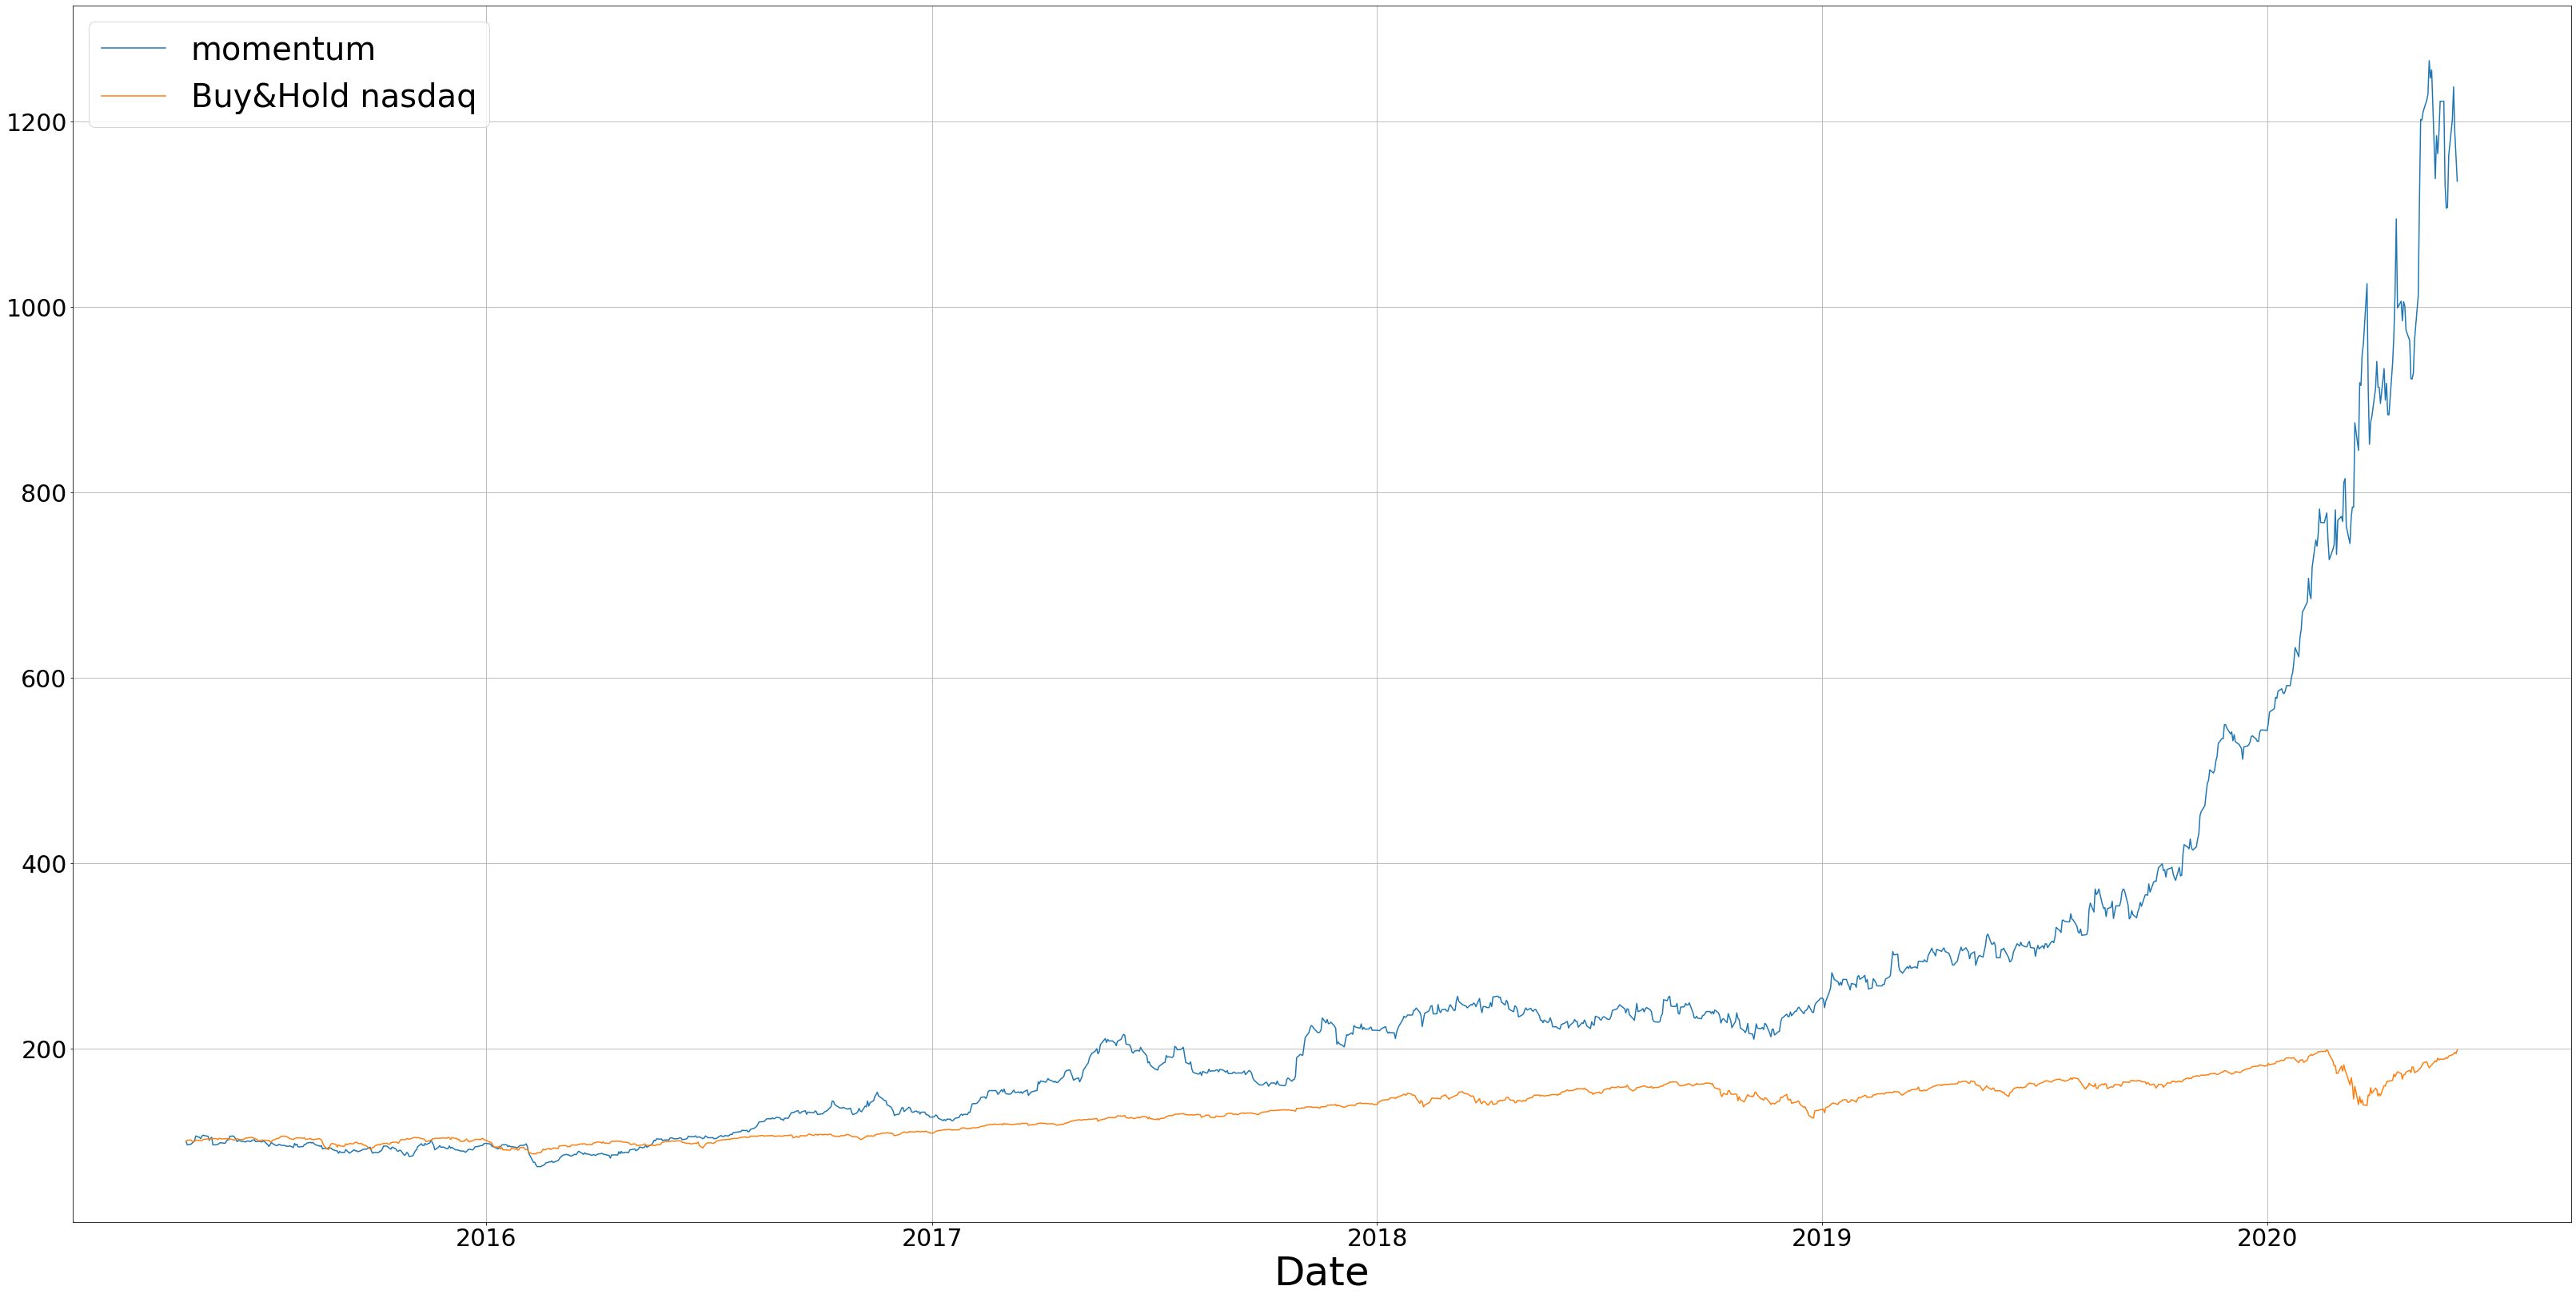

In [39]:
fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(momentum["momentum"])
ax1 = plt.plot(nasdaq["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["momentum", "Buy&Hold nasdaq"], prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [40]:
momentum.to_csv('./data_resultante/momentum_nasdaq.csv')

Ventajas:

- Si se identifican de forma adecuada las acciones con mayor histórico alcista y bajista se lograrán unos altos beneficios.
- Funciona en periodos alcistas como bajistas.

Desventajas:

- Es importante que la serie histórica de precios siga una tendencia, no funciona bien en cambios bruscos como crisis.
- Asume que los activos se van a comportar de la misma forma que han venido haciéndolo previamente.
- Sólo tiene en cuenta información de la variación de cotización de los activos.
- Información accesible para todo el mundo.